In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
# 读取文本文件
file_name = '/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/dsaa5002_2023fall_final_datasets/Data_Q7/socialmedia.graph.txt'
df = pd.read_csv(file_name,  delimiter='\t', comment='#')

In [ ]:
df.shape

(2987623, 2)

In [ ]:
df.head()

,1,2
0,1,3
1,1,4
2,1,5
3,1,6
4,1,7


In [ ]:
df.columns

Index(['1', '2'], dtype='object')

In [ ]:
# 添加列的列名
df.columns = ['FromNodeId', 'ToNodeId']

In [ ]:
data = pd.DataFrame([[3, 4]], columns=df.columns)

df = pd.concat([data, df], ignore_index=True)

In [ ]:
df.head()

,FromNodeId,ToNodeId
0,3,4
1,1,3
2,1,4
3,1,5
4,1,6


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/Q7/df_load.csv')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/Q7/df_load.excel')

# clustering coefficient and degree  distribution of the network.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图
G = nx.from_pandas_edgelist(df, 'FromNodeId', 'ToNodeId', create_using=nx.Graph)

# 计算聚类系数
clustering_coefficient = nx.clustering(G)



Average Clustering Coefficient: 0.08080227518705474


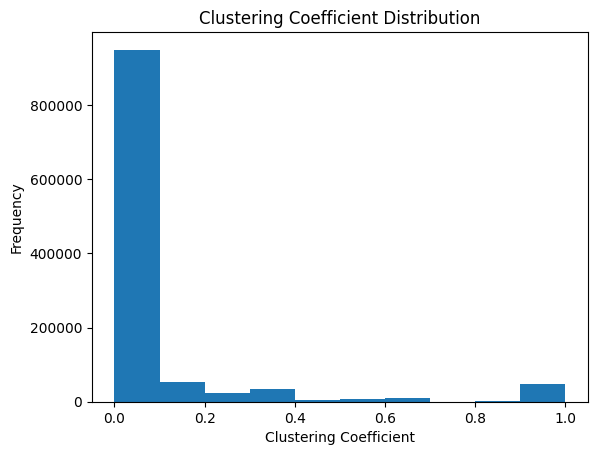

In [ ]:
# Compute average clustering coefficient
average_clustering = nx.average_clustering(G)

# Print average clustering coefficient
print("Average Clustering Coefficient:", average_clustering)

# Plot the clustering coefficient distribution
plt.hist(list(clustering_coefficient.values()), bins=10)
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.title("Clustering Coefficient Distribution")
plt.show()

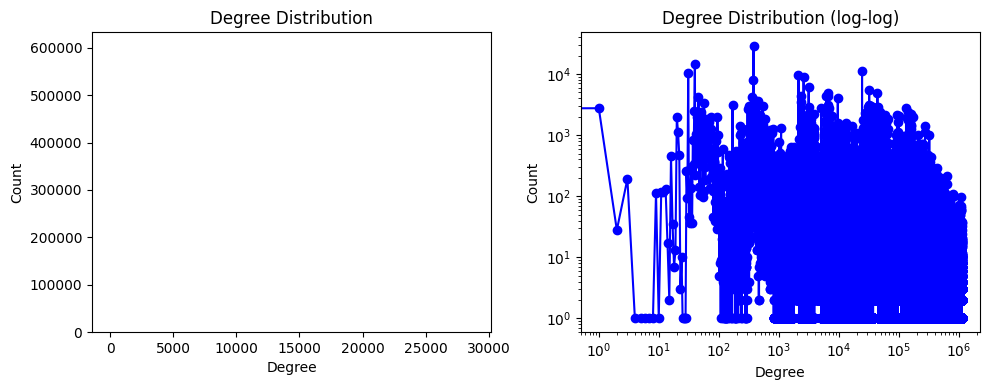

In [ ]:
# 绘制度分布图
degree_sequence = [degree for node, degree in G.degree()]
degree_count = nx.degree_histogram(G)
degrees = range(len(degree_count))

plt.figure(figsize=(10, 4))

# 绘制度分布直方图
plt.subplot(121)
plt.bar(degrees, degree_count, width=0.8, color='b')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')

# 绘制度分布的对数-对数图
plt.subplot(122)
plt.loglog(degree_sequence, 'b-', marker='o')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution (log-log)')

plt.tight_layout()
plt.show()

# influential nodes

In [ ]:
# 计算度中心性
degree_centrality = nx.degree_centrality(G)

# 根据度中心性排序，获取最具影响力的节点
influential_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]


In [ ]:
# 打印最具影响力的节点
print("最具影响力的节点:")
for node in influential_nodes:
    print(node)

最具影响力的节点:
1072
363
35661
106
482709


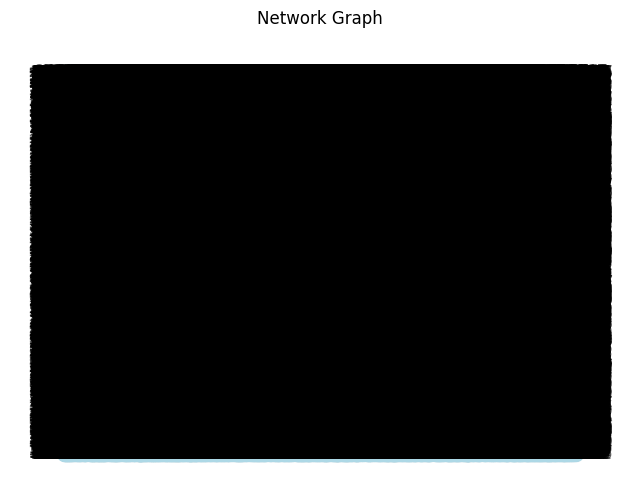

In [ ]:
# 设置节点的布局
pos = nx.random_layout(G)

# 绘制网络图，并调整绘图参数
plt.figure(figsize=(8, 6))  # 调整图像大小
nx.draw_networkx(G, pos, node_color='lightblue', node_size=100, alpha=0.6)
nx.draw_networkx_nodes(G, pos, nodelist=influential_nodes, node_color='red', node_size=200, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.title('Network Graph')
plt.axis('off')
plt.show()

# Isolated Nodes

In [ ]:
random_sample = df.sample(n=500)
subgraph = G.subgraph(random_sample)

In [ ]:
isolated_nodes = [node for node, degree in G.degree() if degree == 0]
print("孤立节点：", isolated_nodes)

孤立节点： []


In [ ]:
# 识别孤立节点
isolated_nodes = list(nx.isolates(G))


In [ ]:
# 打印孤立节点
print("孤立节点:")
for node in isolated_nodes:
    print(node)

孤立节点:


# Connected Components

In [ ]:
# 识别连通分量
connected_components = list(nx.connected_components(G))


In [ ]:
# 打印部分连通分量
print("连通分量:")
for i, component in enumerate(connected_components[:10], 1):
    print(f"Component {i}: {component}")

连通分量:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# 打印连通分量
print("连通分量:")
for i, component in enumerate(connected_components, 1):
    print(f"Component {i}: {component}")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Average Shortest Path Length

In [ ]:
#Compute the average shortest path length
average_shortest_path = nx.average_shortest_path_length(G)


In [ ]:
# Print the average shortest path length
print("Average Shortest Path Length:", average_shortest_path)

# Diameter

In [ ]:
# Calculate the diameter
diameter = nx.diameter(G)

In [ ]:
# Print the diameter
print("Diameter:", diameter)

# Community Structures

In [ ]:
!pip install python-louvain

In [ ]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.7 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import community
import matplotlib.pyplot as plt


# 使用 Girvan-Newman 算法检测社区结构
communities_generator = nx.algorithms.community.girvan_newman(G)
communities = next(communities_generator)

# 统计社区数量和每个社区的节点数
num_communities = len(communities)
community_sizes = [len(c) for c in communities]

# 输出社区数量和每个社区的节点数
print("Number of communities:", num_communities)
print("Community sizes:", community_sizes)



In [ ]:

plt.hist(community_sizes, bins=10)
plt.xlabel("Community Size")
plt.ylabel("Number of Communities")
plt.title("Distribution of Community Sizes")
plt.show()

In [ ]:
# Visualize the network with community colors
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
for community_id in set(partition.values()):
    nodes = [node for node, comm in partition.items() if comm == community_id]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=f"C{community_id}", node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

# 可视化社区结构
pos = nx.spring_layout(G)  # 定义节点布局
plt.figure(figsize=(10, 6))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=10, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [ ]:
# Boundary Visualization
boundary_edges = []
for u, v in G.edges():
    if partition[u] != partition[v]:
        boundary_edges.append((u, v))

# Network Layout
pos = nx.spring_layout(G)

# Heatmap
adjacency_matrix = nx.to_numpy_matrix(G)
community_ids = np.array([partition[node] for node in G.nodes()])
community_matrix = (community_ids[:, None] == community_ids[None, :]).astype(int)



In [ ]:
# Plotting
plt.figure(figsize=(12, 4))

# Boundary Visualization
plt.subplot(131)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=boundary_edges, edge_color='red', width=2)
plt.title('Boundary Visualization')
plt.axis('off')

# Network Layout
plt.subplot(132)
colors = [partition[node] for node in G.nodes()]
nx.draw_networkx(G, pos, node_color=colors, cmap='viridis', node_size=200, with_labels=False)
plt.title('Network Layout')
plt.axis('off')

# Heatmap
plt.subplot(133)
plt.imshow(community_matrix, cmap='binary')
plt.title('Community Heatmap')
plt.colorbar()
plt.xticks(np.arange(len(G.nodes())), labels=G.nodes())
plt.yticks(np.arange(len(G.nodes())), labels=G.nodes())
plt.tight_layout()

plt.show()